In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy 
import pandas as pd

In [3]:
_K_B = scipy.constants.Boltzmann
_TEMPERATURE = 300
_N_A = scipy.constants.Avogadro


def inhibition_to_ddg(ki_a: float, ki_b: float) -> float:
    """
    convert experimental Ki values to binding free-energy difference
    :param ki_a: experimental Ki of ligand 1
    :param ki_b: experimental Ki of ligand 2
    :return: experimental RBFE value
    """
    ic50_a = 2 * ki_a
    ic50_b = 2 * ki_b

    return (_K_B * _N_A * _TEMPERATURE / 4184) * np.log(ic50_b / ic50_a)


def get_experimental_error(error_a, ki_a, error_b, ki_b):
    fraction = ki_b / ki_a
    fraction_error = fraction * np.sqrt((error_b / ki_b) ** 2 + (error_a / ki_a) ** 2)
    return (_K_B * _TEMPERATURE * fraction_error / fraction) * _N_A / 4184

In [4]:
kpc2_afe_results_file = "../kpc2/afe/results_analysis.txt"

In [5]:
with open(kpc2_afe_results_file, "r") as file:
    lines = file.readlines()
print(len(lines))

44


In [11]:
# for line in lines[0:len(lines):2]:
#     print(line)
    
perturbations = [line for line in lines[0:len(lines):2]]
for line in perturbations:
    print(line)
results = [line for line in lines[1:len(lines):2]]
# print(len(results))

lig_11~lig_5

lig_1~lig_4

lig_16~lig_9

lig_11~lig_15

lig_13~lig_7

lig_1~lig_2

lig_3~lig_6

lig_2~lig_4

lig_15~lig_9

lig_15~lig_5

lig_13~lig_3

lig_6~lig_8

lig_4~lig_6

lig_12~lig_15

lig_10~lig_4

lig_14~lig_15

lig_6~lig_7

lig_10~lig_8

lig_9~lig_10

lig_13~lig_6

lig_16~lig_10

lig_12~lig_14



In [14]:
free_energy_differences = []
free_energy_errors = []
for result in results:
    split_results = result.split("±")
    free_energy_differences.append(float(split_results[0].replace("kcal/mol", "").replace("⁻¹ \n", "")))
    free_energy_errors.append(float(split_results[1].replace("kcal/mol", "").replace("⁻¹ \n", "").replace("kcal mol", "")))
    
    

In [15]:
first_indices = []
second_indices = []
for line in perturbations:
    no_newline = line.strip("\n")
    lig_1 = no_newline.split("~")[0].replace("lig_", "")
    lig_2 = no_newline.split("~")[1].replace("lig_", "")  
    first_indices.append(int(lig_1) - 1)
    second_indices.append(int(lig_2) - 1)

In [16]:
experimental_file = pd.read_csv("../kpc2/afe/experimental_ki.txt")
experimental_ki, experimental_ki_error = experimental_file["K_i"], experimental_file["K_i_err"]
print(experimental_file)

    ligand      K_i  K_i_err
0        1   32.900    3.300
1        2    8.400    0.400
2        3   15.300    2.500
3        4   23.300    4.600
4        5  154.400    0.000
5        6    1.400    0.200
6        7   11.900    1.100
7        8    9.300    1.800
8        9    0.246    0.047
9       10    8.500    0.300
10      11  142.300   22.300
11      12  101.500    8.600
12      13    2.200    0.800
13      14  730.400   87.400
14      15  326.100   56.800
15      16    0.020    0.007


In [17]:
experimental_free_energies = []
experimental_errors = []
for i in range(len(first_indices)):
    i_1, i_2 = first_indices[i], second_indices[i]
    experimental_free_energy = inhibition_to_ddg(experimental_ki[i_1], experimental_ki[i_2])
    # error_a, ki_a, error_b, ki_b
    experimental_error = get_experimental_error(experimental_ki_error[i_1], experimental_ki[i_1], experimental_ki_error[i_2], experimental_ki[i_2])
    experimental_free_energies.append(experimental_free_energy)
    experimental_errors.append(experimental_error)
                                                
    

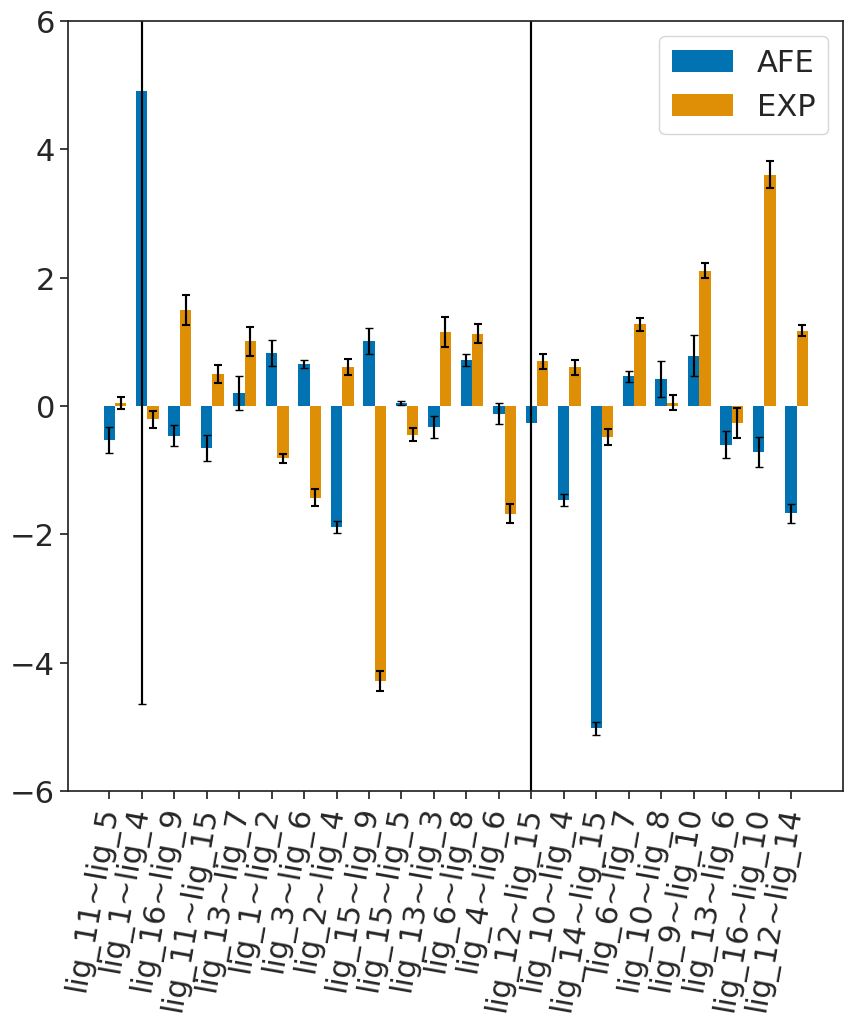

In [24]:
fig = plt.figure(figsize=(10, 10))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
x_label_locations = np.arange(len(free_energy_differences))
bar_width = 0.35

plt.bar(x_label_locations - bar_width / 2,
        height=free_energy_differences,
        width=bar_width,
        yerr=free_energy_errors,
        label="AFE",
        # color="#0099AB",
        linewidth=0)

(_, caps, _) = plt.errorbar(x_label_locations - bar_width / 2,
                            free_energy_differences,
                            color="black",
                            yerr=free_energy_errors,
                            capsize=3,
                            linestyle="")

plt.bar(x_label_locations + bar_width / 2,
        height=experimental_free_energies,
        width=bar_width,
        yerr=experimental_errors,
        label="EXP",
        # color="#0099AB",
        linewidth=0)

(_, caps, _) = plt.errorbar(x_label_locations + bar_width / 2,
                            experimental_free_energies,
                            color="black",
                            yerr=experimental_errors,
                            capsize=3,
                            linestyle="")

for cap in caps:
    cap.set_color("black")
    cap.set_markeredgewidth(1.5)
plt.ylim(-6, 6)
plt.xticks(x_label_locations - bar_width / 2, perturbations, rotation=80, ha="center")
plt.legend()


(-2.0, 2.0)

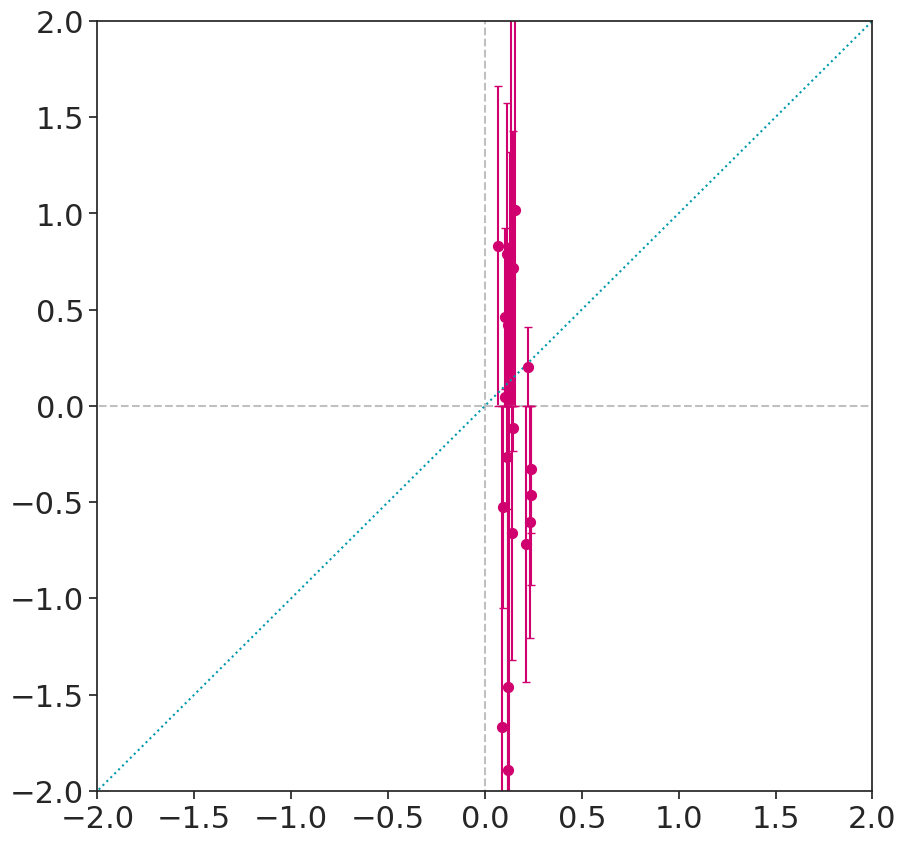

In [22]:
plt.figure(figsize=(10, 10))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=2)
plt.scatter(experimental_errors, free_energy_differences, s=50, color="#D0006F")
# plt.scatter(3, 2.5, s=0)

(_, caps, _) = plt.errorbar(experimental_errors,
                           free_energy_differences,
                           color="#D0006F",
                           yerr=free_energy_differences,
                           capsize=3,
                           linestyle="",
                           zorder=-1)

plt.plot([-4.5, 4.5], [-4.5, 4.5], color="#0099AB", linestyle=":", zorder=-1)
plt.vlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.hlines(0, -4.5, 4.5, color = "silver", linestyle="--", zorder=-1)
plt.xlim(-2, 2)
plt.ylim(-2, 2)
